In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Sequential Composition
epsilon1 = 1
epsilon2 = 1
epsilon_total = 2


In [17]:
# Satisfies 1-differential privacy
def F1():
    return np.random.laplace(loc=0, scale=1/epsilon1)

In [18]:
# Satisfies 1-differential privacy
def F2():
    return np.random.laplace(loc=0, scale=1/epsilon2)

In [19]:
# Satisfies 2-differential privacy
def F3():
    return np.random.laplace(loc=0, scale=1/epsilon_total)

In [20]:
# Satisfies 2-differential privacy by sequential composition
def F_combined():
    return (F1() + F2()) / 2

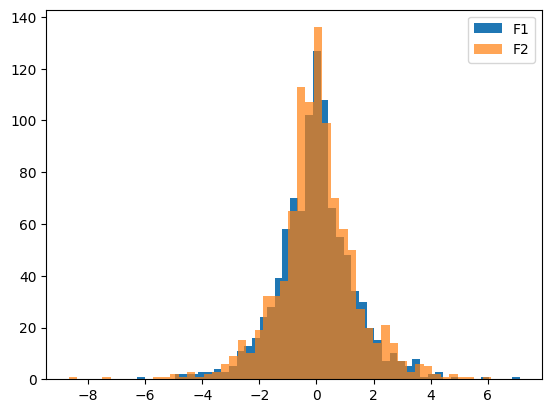

In [22]:
# Plot F1
plt.hist([F1() for i in range(1000)], bins=50, label='F1')

# Plot F2 (should look the same)
plt.hist([F2() for i in range(1000)], bins=50, alpha =.7, label='F2')
plt.legend()

In [23]:
# The histogram shows F1 and F2 look similar with 1-differential privacy

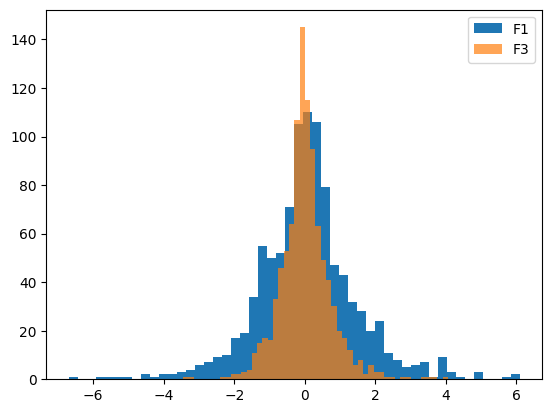

In [26]:
# If we graph F1 and F3, we see that the distribution of outputs from F3 looks "pointer" than that of F!,
# because its higher privacy budget implies less privacy.
plt.hist([F1() for i in range(1000)], bins=50, label='F1')
plt.hist([F3() for i in range(1000)], bins=50, alpha=.7, label='F3')
plt.legend()

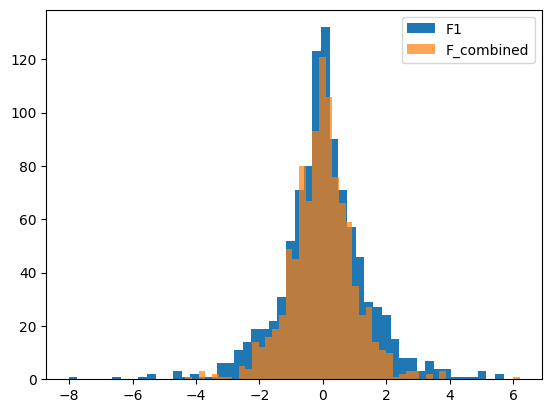

In [27]:
# If we graph F1 and F_combined, we see that the distribution outputs from F_combined is pointer.
# This shows more accuracy and less privacy
plt.hist([F1() for i in range(1000)], bins=50, label='F1')
plt.hist([F_combined() for i in range(1000)], bins=50, alpha=.7, label='F_combined')
plt.legend()

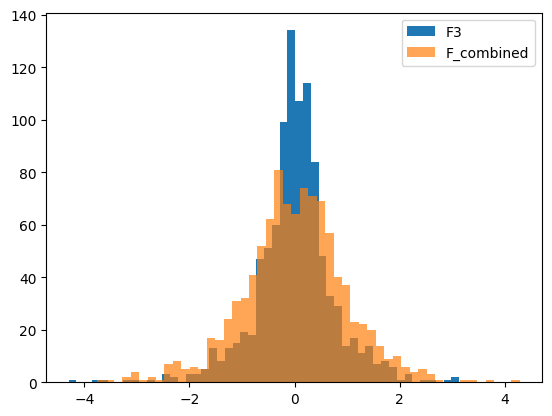

In [28]:
# What about F3 and F_combined?
# values for these two mechanisms are the same - both have an of 2. 
# Therefore, their output distributions should look the same.
plt.hist([F3() for i in range(1000)], bins=50, label='F3')
plt.hist([F_combined() for i in range(1000)], bins=50, alpha=.7, label='F_combined')
plt.legend()

In [ ]:
# In the above histogram, F3 still looks pointer because sequential composition yields an upper bound on the total 
# of several releases, the actual cumulative impact on privacy might be lower.
# Sequential composition is an extremely useful way to control total privacy cost. 
# Although it is not necessarily an exact bound.